### Imports et initialisations

In [137]:
import numpy as np
import random
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from clustertools import *

#répertoire dans lequel seront stockés les clusters, doit se terminer obligatoirement par /
cluster_dir = "clusters/Africain_Std_clusters/"
clean_dataset_file = "datasets/haine2022_oversampling_africainStd.txt"
raw_dataset_file = "datasets/haine2022_oversampling_africain.txt"

### Récupération des tweets

In [138]:
with open(clean_dataset_file, "r") as file:
    lines = file.readlines()
    
clean_dataset = [line.split() for line in lines]

with open(raw_dataset_file, "r") as file:
    raw_dataset = file.read().splitlines()

### Création des échantillons
Ne pas exécuter pour travailler avec toutes les données

In [3]:
sample_size = 5000

idx_list = random.sample(range(len(clean_dataset)), sample_size)
clean_dataset = [clean_dataset[i] for i in idx_list]
raw_dataset = [raw_dataset[i] for i in idx_list]

### Encodage à l'aide d'un modèle word2vec entraîné avec les données

On charge le modèle depuis le disque

In [139]:
from gensim.models import KeyedVectors

In [140]:
model = KeyedVectors.load("models/w2vec_model_d300_1M_AF_Std")
dim = 300

In [141]:
# Encode un message
# msg : liste de chaînes de caractères correspondant aux mots du message
# model : le modèle utilisé pour l'encodage
# dim : la dimension des vecteurs mots dans ce modèle
# Renvoie un vecteur qui est la moyenne de tous les vecteurs correspondants aux mots du message
# Si aucun mot du message n'est dans le modèle, renvoie un vecteur de zéros.
def encode(msg, model, dim):
    return np.mean([model[word] for word in msg if word in model] or [np.zeros(dim)], axis = 0)

In [142]:
%%time
#encodage de l'échantillon pour créer le jeu de données
dataset_encoded = np.array([encode(msg, model, dim) for msg in clean_dataset])


CPU times: user 239 ms, sys: 0 ns, total: 239 ms
Wall time: 239 ms


### Visualisation du dataset

- On réalise une réduction de dimension afin de visualiser les données dans une grille en deux dimensions
- On utilise pour cela la méthode PCA

In [143]:
%%time

pca = PCA(n_components=2)

#On crée une version en deux dimensions de notre jeu de données
two_dim_dataset = pca.fit_transform(dataset_encoded)

CPU times: user 620 ms, sys: 942 ms, total: 1.56 s
Wall time: 244 ms


In [144]:
#On utilise la matrice transposée de notre jeu de données pour pouvoir visualiser les données
b = two_dim_dataset.T

#Taille des figures
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["lines.markersize"] = 3

In [145]:
init_globals(clean_dataset, raw_dataset, two_dim_dataset, cluster_dir)

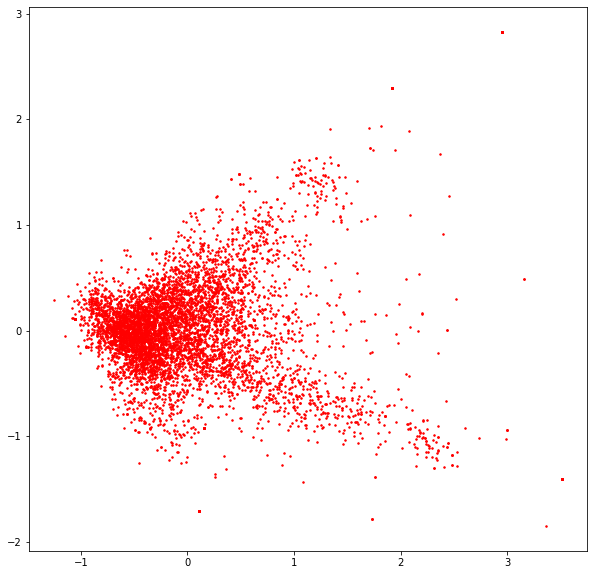

In [146]:
#Affichage des données
plt.plot(b[0], b[1], 'r.')
plt.show()

### SOM

In [147]:
from minisom import MiniSom

In [166]:
m = 5
n = 5
som = MiniSom(m, n, 300, neighborhood_function='gaussian', random_seed=0)
som.pca_weights_init(dataset_encoded)

In [167]:
%%time
som.train(dataset_encoded, 100000, verbose=True)

 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 1.3109186633351204
CPU times: user 19.2 s, sys: 2.25 s, total: 21.4 s
Wall time: 19 s


In [168]:
%%time
pred = []
for msg in dataset_encoded:
    winner = som.winner(msg)
    pred.append(winner[0]*n+winner[1])

CPU times: user 418 ms, sys: 347 ms, total: 765 ms
Wall time: 236 ms


In [169]:
centroids = []
for row in som.get_weights():
    for w in row:
        centroids.append(w)

In [170]:
centers = [[r[0] for r in model.similar_by_vector(c)] for c in centroids]

Cluster 0 : 198 messages
160 messages contiennent un mot-clé haineux (soit 80.81%)
Les 20 mots les plus fréquents : art gros espec temp sait jsuis international #legomonkiekid sing ice and têt normal ? ptdrrrr pq banan préfer dégag aim 
Les mots les plus proches du centre : macaqu asuk bouffeux loool lactos buddy imberb japprend srx. ghand 

Cluster 1 : 59 messages
17 messages contiennent un mot-clé haineux (soit 28.81%)
Les 20 mots les plus fréquents : écol enfant format etc. national babouin, parc récréat travail zoom anné connaiss paris negr? do petit découvert 7 langu banani 
Les mots les plus proches du centre : kouloughl 3an. bill, roro? balais révision. antagon, assas amphithéâtr. qu’bac 

Cluster 2 : 121 messages
32 messages contiennent un mot-clé haineux (soit 26.45%)
Les 20 mots les plus fréquents : frer tweet incroi veux bordel vais jss ptdrrrrrr ok sais ptn voit bref laiss fatigu wsh envi arrêt dinguer vi 
Les mots les plus proches du centre : dor? rajel jur! lheur aprz waa

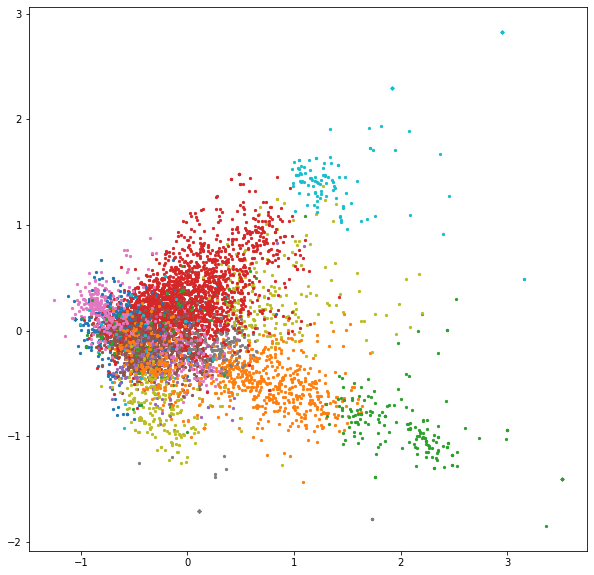

In [171]:
parse_results(pred, "som_" + str(m*n), centers)

### Sauvegarder le modèle et les poids

In [18]:
import pickle

dir = cluster_dir + "som_" + str(m*n) + "/"

with open(dir + 'som.p', 'wb') as outfile:
    pickle.dump(som, outfile)
    
np.save(dir + "som_weights.npy" ,som.get_weights())

FileNotFoundError: [Errno 2] No such file or directory: 'clusters/1M_Std_clusters/som_625/som.p'

In [90]:
import importlib

In [89]:
import clustertools


In [97]:
importlib.reload(clustertools)

<module 'clustertools' from '/mnt/54782AD6782AB720/fidle/hobsia/clustertools.py'>

In [98]:
from clustertools import *

In [52]:
wlists, mlists, cmlists, e2dmlists, mfw, hkw, clust_n_msg = parse(pred)

IndexError: list index out of range

In [53]:
raw_dataset

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '<!DOCTYPE html>',
 '<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark" data-a11y-animated-images="system">',
 '  <head>',
 '    <meta charset="utf-8">',
 '  <link rel="dns-prefetch" href="https://github.githubassets.com">',
 '  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">',
 '  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">',
 '  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">',
 '  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>',
 '  <link rel="preconnect" href="https://avatars.githubusercontent.com">',
 '',
 '',
 '',
 '  <link crossorigin="anonymous" media="all" integrity="sha512-IVVa++hW3DBYJnNsmMMiUwt96BJ1mjUpGNDRWeui5BY1iA04E58M5NujgomnZU9R9DB+H99IlE7a+9b5XlO25g==" rel="stylesheet" href="https://github.githubassets.com/assets/light-21555afbe856.css" /><link crossorigin="anonymous" media="all" integrity="s